In [1]:
#importing all necessary packages
import numpy as np 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
#Reading the dataset
df=pd.read_csv("drug200.csv")
print(df.shape)
df.head(10)

(200, 6)


,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
5,22,F,NORMAL,HIGH,8.607,drugX
6,49,F,NORMAL,HIGH,16.275,drugY
7,41,M,LOW,HIGH,11.037,drugC
8,60,M,NORMAL,HIGH,15.171,drugY
9,43,M,LOW,NORMAL,19.368,drugY


Medical data of the patients who have suffered from same illness. A patient was given one of the 5 drugs: A, B, C, X or Y.
Making a decision tree to predict drugs for future patient based on multiple parameters in the existing data.

In [3]:
#Creating input feature matrix from dataframe
X = df[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']].values
X[0:10]

array([[23, 'F', 'HIGH', 'HIGH', 25.355],
       [47, 'M', 'LOW', 'HIGH', 13.093],
       [47, 'M', 'LOW', 'HIGH', 10.113999999999999],
       [28, 'F', 'NORMAL', 'HIGH', 7.797999999999999],
       [61, 'F', 'LOW', 'HIGH', 18.043],
       [22, 'F', 'NORMAL', 'HIGH', 8.607000000000001],
       [49, 'F', 'NORMAL', 'HIGH', 16.275],
       [41, 'M', 'LOW', 'HIGH', 11.037],
       [60, 'M', 'NORMAL', 'HIGH', 15.171],
       [43, 'M', 'LOW', 'NORMAL', 19.368]], dtype=object)

In [4]:
#Converting categorical variable into numerical values bcoz sklearn decision tree do not handle categorical variable
le_sex = LabelEncoder()
le_sex.fit(['F','M'])
X[:,1] = le_sex.transform(X[:,1])
le_BP = LabelEncoder()
le_BP.fit([ 'LOW', 'NORMAL', 'HIGH'])
X[:,2] = le_BP.transform(X[:,2])
le_Chol = LabelEncoder()
le_Chol.fit([ 'NORMAL', 'HIGH'])
X[:,3] = le_Chol.transform(X[:,3]) 

X[0:10]

array([[23, 0, 0, 0, 25.355],
       [47, 1, 1, 0, 13.093],
       [47, 1, 1, 0, 10.113999999999999],
       [28, 0, 2, 0, 7.797999999999999],
       [61, 0, 1, 0, 18.043],
       [22, 0, 2, 0, 8.607000000000001],
       [49, 0, 2, 0, 16.275],
       [41, 1, 1, 0, 11.037],
       [60, 1, 2, 0, 15.171],
       [43, 1, 1, 1, 19.368]], dtype=object)

In [5]:
#Setting predicted values
Y=df["Drug"]
Y.head(10)

0    drugY
1    drugC
2    drugC
3    drugX
4    drugY
5    drugX
6    drugY
7    drugC
8    drugY
9    drugY
Name: Drug, dtype: object

In [6]:
#Splitting the dataset for training and testing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3,random_state=3)

In [7]:
#CART Algorithm
#Creating an instance of Decision Tree Classifier
tree_CART = DecisionTreeClassifier(criterion="gini")
#Fitting the training to the instance created
tree_CART.fit(X_train,Y_train)

DecisionTreeClassifier()

In [8]:
#predicting the drug type for test data
predict_tree_=tree_CART.predict(X_test)
print(predict_tree_[0:10])
print(Y_test[0:10])

['drugY' 'drugX' 'drugX' 'drugX' 'drugX' 'drugC' 'drugY' 'drugA' 'drugB'
 'drugA']
40     drugY
51     drugX
139    drugX
197    drugX
170    drugX
82     drugC
183    drugY
46     drugA
70     drugB
100    drugA
Name: Drug, dtype: object


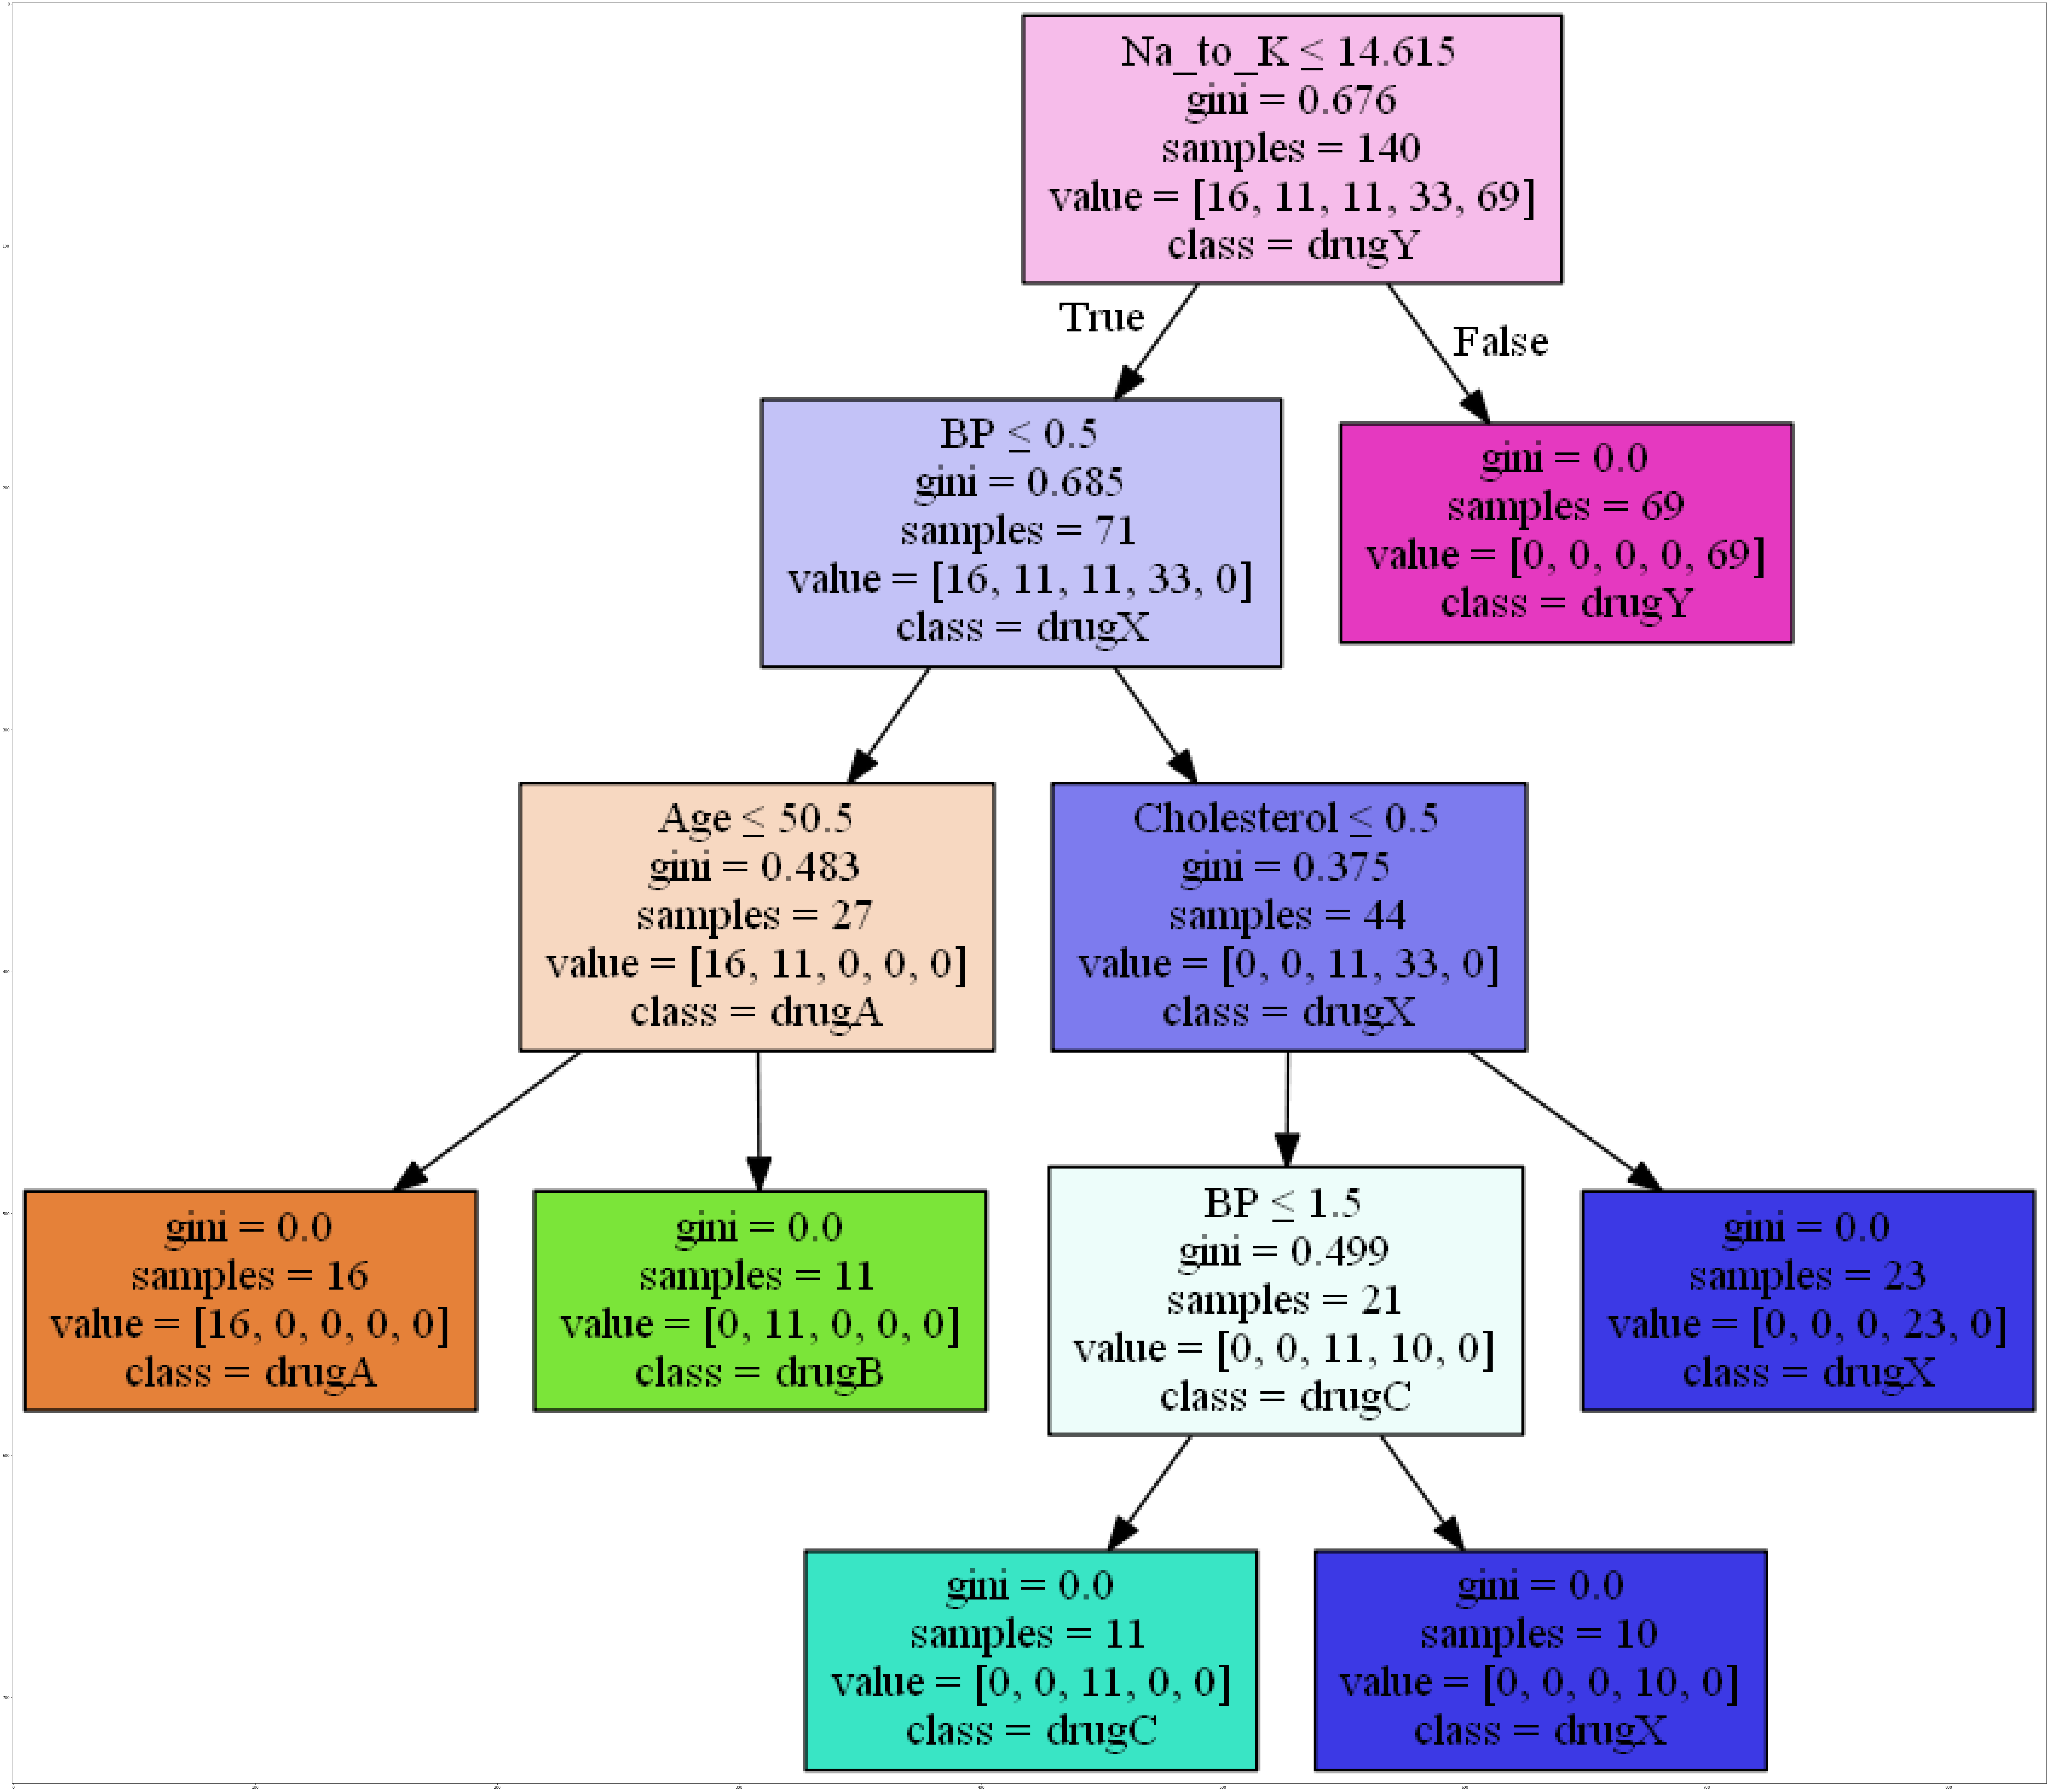

In [9]:
#Visualization
dot_data = StringIO()
filename = "drugtree_.png"
featureNames = df.columns[0:5]
targetNames = df["Drug"].unique().tolist()
out=tree.export_graphviz(tree_CART,feature_names=featureNames, out_file=dot_data, class_names= np.unique(Y_train), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')

In [10]:
#Accuracy of CART decision tree
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(Y_test, predict_tree_))

DecisionTrees's Accuracy:  0.9833333333333333
